In [1]:
import pandas as pd 
import numpy as np
pd.options.display.max_columns=None

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_1 = pd.read_csv(r'C:\Users\RKRIS\Downloads\recomm project data\Dataset\phone_user_review_file_1.csv', encoding= 'ISO-8859-1')
file_2 = pd.read_csv(r'C:\Users\RKRIS\Downloads\recomm project data\Dataset\phone_user_review_file_2.csv', encoding= 'ISO-8859-1')
file_3 = pd.read_csv(r'C:\Users\RKRIS\Downloads\recomm project data\Dataset\phone_user_review_file_3.csv', encoding= 'ISO-8859-1')
file_4 = pd.read_csv(r'C:\Users\RKRIS\Downloads\recomm project data\Dataset\phone_user_review_file_4.csv', encoding= 'ISO-8859-1')
file_5 = pd.read_csv(r'C:\Users\RKRIS\Downloads\recomm project data\Dataset\phone_user_review_file_5.csv', encoding= 'ISO-8859-1')
file_6 = pd.read_csv(r'C:\Users\RKRIS\Downloads\recomm project data\Dataset\phone_user_review_file_6.csv', encoding= 'ISO-8859-1')


Concating all the above files along the Column axis.

In [3]:
df = pd.concat([file_1,file_2,file_3,file_4,file_5,file_6], axis = 0)

Lets look at the shape and top 5 rows of the Dataset.

In [4]:
print(df.shape)
df.head()

(1415133, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


Lets Check if there are any Missing values.

In [5]:
df.isna().mean()*10

phone_url    0.000000
date         0.000000
lang         0.000000
country      0.000000
source       0.000000
domain       0.000000
score        0.448643
score_max    0.448643
extract      0.136814
author       0.446615
product      0.000007
dtype: float64

We can see columns are having missing values more than 40% its a better option to drop them.

Lets start with the Preprocessing of the Dataset.

In [6]:
def preprocess_inputs(df):
    
    df=df.copy()
    
    # Dropping the nan Values
    df=df.dropna().reset_index(drop=True)
    
    # Rounding off the Score Feature.
    df['score']=np.round(df['score']).astype('int')
    
    # Dropping the Unnecessary columns.
    df.drop(['date','phone_url','lang','country','source','score_max','domain','extract'], axis=1, inplace=True)
    
    # Taking a Sample off 1000000. 
    df = df.iloc[:1000000,0:]
    
    # Drop the Duplicated values if there are any
    df = df.drop_duplicates(keep ='first')
     
    return df
    

In [7]:
df = preprocess_inputs(df)

Lets have a Look on Processed Data.

In [8]:
df

,score,author,product
0,10,CarolAnn35,Samsung Galaxy S8
1,10,james0923,Samsung Galaxy S8
2,6,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,S Ate Mine,Samsung Galaxy S8
...,...,...,...
999995,10,ALLANSOUZASP,Nokia E63
999996,6,Jose Luis,Nokia E63
999997,6,Alberto,Nokia E63
999998,10,ESHOPVIRTUALELETRONICOSEVENDAS,Nokia E63


Lets See the 'Score' Distribution in our dataset.

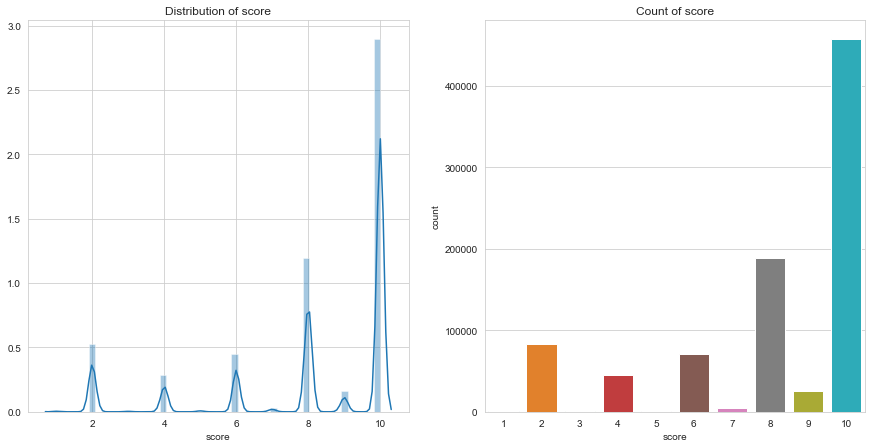

In [9]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
g = sns.distplot(df['score'], ax = ax).set_title('Distribution of score')
ax = fig.add_subplot(122)
g = sns.countplot(df['score']).set_title('Count of score')

Lets see the Frequent users to give ratings.

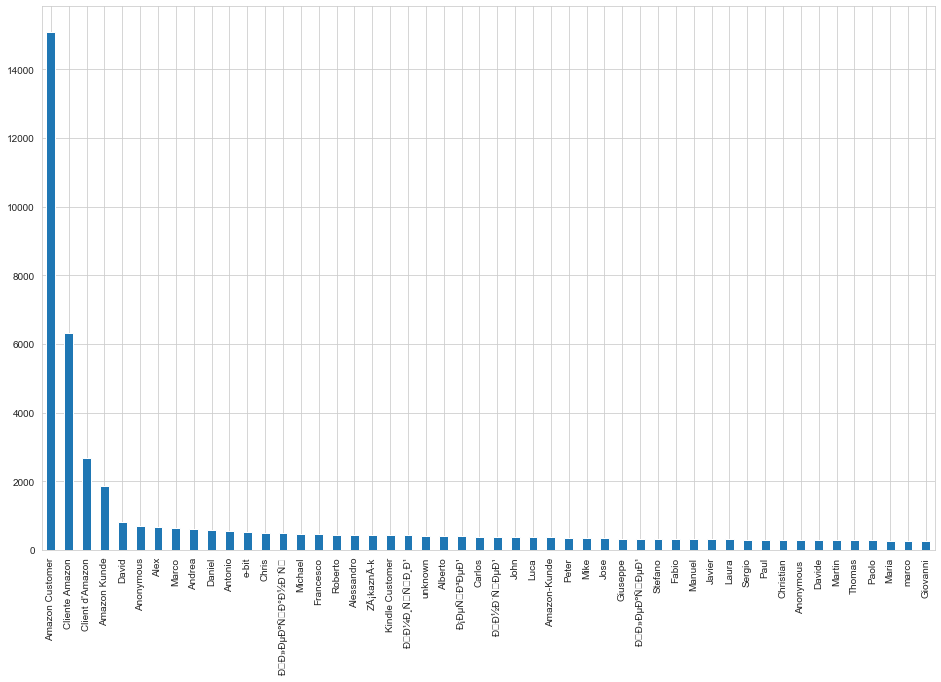

In [10]:
df['author'].value_counts().head(50).plot(kind='bar', figsize=(16,10))

#  Products having more than 50 ratings and users who have given more than 50 ratings.

In [11]:
popular_products =df['product'].value_counts()[df['product'].value_counts() > 50]
popular_products.index
df=df.query('product in @popular_products.index')

In [12]:
df['product'].value_counts()

OnePlus 3 (Graphite, 64 GB)                                                                                                                                            2219
Lenovo Vibe K4 Note (White,16GB)                                                                                                                                       2124
Lenovo Vibe K4 Note (Black, 16GB)                                                                                                                                      1836
Samsung Galaxy J3 (8GB)                                                                                                                                                1801
OnePlus 3 (Soft Gold, 64 GB)                                                                                                                                           1793
                                                                                                                                            

In [13]:
popular_users=df['author'].value_counts()[df['author'].value_counts() > 50]
popular_users.index
df=df.query('author in @popular_users.index')


In [14]:
df['author'].value_counts()

Amazon Customer                6306
Cliente Amazon                 1634
Amazon Kunde                    986
Client d'Amazon                 682
David                           429
                               ... 
Toni                             51
???????????? ??????????????      51
ÐÐ¾Ð½ÑÑÐ°Ð½ÑÐ¸Ð½             51
Christopher                      51
K                                51
Name: author, Length: 330, dtype: int64

In [15]:
print(df.shape)
df.head()

(43267, 3)


,score,author,product
270,10,ÐÐ³Ð¾Ñ,Samsung Galaxy S8
271,10,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S8
272,10,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ,Samsung Galaxy S8
274,8,Ð¡ÐµÑÐ³ÐµÐ¹,Samsung Galaxy S8
276,8,Michael,Samsung Galaxy S8 Zwart


Lets See Top 10 and  Bottom 10 users bassed on ratings.

In [16]:
# Top and bottom 10 users based on # of ratings given
print('Top 10 users based on # of ratings given'); print('--'*40)
most_rated = df.groupby('author').size().sort_values(ascending = False)[:10]
display(most_rated)

print('\nBottom 10 users based on # of ratings given'); print('--'*40)
least_rated = df.groupby('author').size().sort_values(ascending = True)[:10]
display(least_rated)

Top 10 users based on # of ratings given
--------------------------------------------------------------------------------


author
Amazon Customer    6306
Cliente Amazon     1634
Amazon Kunde        986
Client d'Amazon     682
David               429
Alex                419
Marco               371
Andrea              367
Daniel              353
Chris               303
dtype: int64


Bottom 10 users based on # of ratings given
--------------------------------------------------------------------------------


author
???????????? ??????????????    51
Christopher                    51
K                              51
Eva                            51
Robin                          51
ÐÐ¾Ð½ÑÑÐ°Ð½ÑÐ¸Ð½           51
Toni                           51
Andre                          52
Sven                           52
Franco                         52
dtype: int64

#  Grouping the dataset and ranking them accordingly.

In [17]:
df_grouped = df.groupby('product').agg({'author': 'count'}).reset_index()
df_grouped.rename(columns = {'author': 'score'},inplace=True)
df_grouped.head()

,product,score
0,3 FILMS PROTECTION ECRAN SAMSUNG Galaxy Ace S5...,1
1,5-Zoll- Android 4.2 Cubot P9 3G Smart Phone MT...,2
2,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,5
3,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK ...",4
4,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui...",6


In [18]:
#Sort the products on recommendation score 
df_sort = df_grouped.sort_values(['score', 'product'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
df_sort['Rank'] = df_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = df_sort.head(5) 
popularity_recommendations

,product,score,Rank
1159,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",165,1.0
1181,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",154,2.0
1634,Lenovo Motorola Moto G 4G (2 Generazione) Smar...,151,3.0
1173,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",147,4.0
1641,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",147,5.0


# Popularity Based Recommender model.

In [19]:
def recommend(author):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['author'] = author 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [20]:
find_recom = [324468,30148,404105]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the author index: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the author index: 324468

      author                                            product  score  Rank
1159  324468  Huawei P8 Lite Smartphone, Display 5" IPS, Pro...    165   1.0
1181  324468  Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...    154   2.0
1634  324468  Lenovo Motorola Moto G 4G (2 Generazione) Smar...    151   3.0
1173  324468  Huawei P8 lite Smartphone, Display 5.0" IPS, D...    147   4.0
1641  324468  Lenovo Motorola Moto G Smartphone, 4,5 pollici...    147   5.0


Here is the recommendation for the author index: 30148

      author                                            product  score  Rank
1159   30148  Huawei P8 Lite Smartphone, Display 5" IPS, Pro...    165   1.0
1181   30148  Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...    154   2.0
1634   30148  Lenovo Motorola Moto G 4G (2 Generazione) Smar...    151   3.0
1173   30148  Huawei P8 lite Smartphone, Display 5.0" IPS, D...    147   4.0
1641   30148  Lenovo Motorola Moto G S

Since this is a popularity-based recommender model, recommendations remain the same for all users

We predict the products based on the popularity. 

# Build a User-Based Collaborative Filtering model.

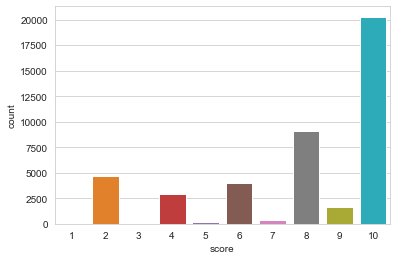

In [21]:
import seaborn as sns
sns.countplot(data=df,x='score')

In [22]:
#2 Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 10))

In [23]:
data = Dataset.load_from_df(df[['author','product','score']], reader)

In [24]:
data.df.head()

,author,product,score
270,ÐÐ³Ð¾Ñ,Samsung Galaxy S8,10
271,ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ,Samsung Galaxy S8,10
272,ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ,Samsung Galaxy S8,10
274,Ð¡ÐµÑÐ³ÐµÐ¹,Samsung Galaxy S8,8
276,Michael,Samsung Galaxy S8 Zwart,8


# Splitting the Dataset

In [25]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25, random_state = 612)

In [26]:
from surprise import SVD
from surprise import accuracy

SVD_model = SVD(n_factors=50,biased = False)
SVD_model.fit(trainset)

In [27]:
test_pred = SVD_model.test(testset)

RMSE for SVD model

In [28]:
accuracy.rmse(test_pred)

RMSE: 3.0678


3.0677877592426364

In [29]:
test_pred = pd.DataFrame(test_pred)

In [30]:
test_pred.columns = ["User","product", "score", "est", "details"]

In [31]:
test_pred=test_pred.reset_index()

In [32]:
test_pred

,index,User,product,score,est,details
0,0,?????????????? ????????????,Nokia 301 Dual Sim,8.0,6.171016,{'was_impossible': False}
1,1,ÐÐ½ÑÐ¾Ð½,Samsung Galaxy S7 edge,10.0,10.000000,{'was_impossible': False}
2,2,ÐÐ³Ð¾ÑÑ,Sony Xperia L (ÐºÑÐ°ÑÐ½ÑÐ¹),10.0,9.087625,{'was_impossible': False}
3,3,Christopher,LG Octane VN530 Verizon CDMA Slider Cell Phone...,10.0,5.566633,{'was_impossible': False}
4,4,Amazon Customer,"HTC Desire HD Smartphone (10,9 cm (4.3 Zoll) T...",2.0,5.681829,{'was_impossible': False}
...,...,...,...,...,...,...
10812,10812,giuseppe,"Samsung I9301 Galaxy S III Neo Smartphone, 16 ...",10.0,8.206199,{'was_impossible': False}
10813,10813,Fabrizio,"Microsoft Lumia 640 XL Smartphone, 8 GB, Bianc...",8.0,9.656266,{'was_impossible': False}
10814,10814,Amazon Customer,Samsung Galaxy S5 Unlocked Gsm Android Phone 4...,10.0,4.212970,{'was_impossible': False}
10815,10815,marco,"Samsung Galaxy J5 Smartphone, Oro [Italia]",4.0,6.975123,{'was_impossible': False}


Check top 5 Recommendations for particular user

In [33]:
def get_recommendations(userid,num):
    user_rec = test_pred[test_pred['User'] == 'Amazon Customer'][['User','product','score','est']].sort_values(by = 'est', ascending =False).head(num)
    return user_rec

In [34]:
get_recommendations('Amazon Customer',5)

,User,product,score,est
4701,Amazon Customer,HTC Desire C Sim Free Smartphone - White,2.0,10.000000
6850,Amazon Customer,Samsung Giorgio Armani Galaxy S I9010 Smartpho...,8.0,10.000000
2524,Amazon Customer,Nokia Asha 220 2.4 inch Sim Free Mobile Phone ...,2.0,10.000000
10716,Amazon Customer,BLU Studio 6.0 HD Smartphone - GSM Unlocked - ...,2.0,9.994923
3992,Amazon Customer,Motorola Moto X 32GB Developer Editon - Verizo...,8.0,9.982397


In [35]:
def get_recommendations(userid,num):
    user_rec = test_pred[test_pred['User'] == 'Cliente Amazon'][['User','product','score','est']].sort_values(by = 'est', ascending =False).head(num)
    return user_rec

In [36]:
get_recommendations('Cliente Amazon',5) 

,User,product,score,est
8282,Cliente Amazon,"Samsung Galaxy S III Smartphone, Bianco [Italia]",8.0,9.087881
7834,Cliente Amazon,Xiaomi RedMi Note 4 G - Smartphone libre Andro...,2.0,9.052351
3805,Cliente Amazon,Xiaomi RedMi Note 4 G - Smartphone libre Andro...,8.0,9.052351
182,Cliente Amazon,Xiaomi RedMi Note 4 G - Smartphone libre Andro...,4.0,9.052351
10247,Cliente Amazon,Samsung Galaxy S5 - Smartphone libre Android (...,2.0,8.881406


In [37]:
def get_recommendations(userid,num):
    user_rec = test_pred[test_pred['User'] == 'Gaurav'][['User','product','score','est']].sort_values(by = 'est', ascending =False).head(num)
    return user_rec

In [38]:
get_recommendations('Gaurav',5)

,User,product,score,est
5310,Gaurav,Nokia Lumia 520 (White),10.0,9.589163
9218,Gaurav,"Mi 4i (White, 16GB)",8.0,9.126924
1673,Gaurav,"Samsung Galaxy J7 SM-J700F (Black, 16GB)",10.0,8.943269
1384,Gaurav,"OnePlus 3 (Graphite, 64 GB)",10.0,8.166844
3458,Gaurav,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",10.0,7.680302


# Lets fit the Knn model and check RMSE

In [39]:
from surprise import KNNWithMeans
from surprise import accuracy

In [40]:
KNNalgo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
KNNalgo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Check Train Set Accuracy

In [41]:
print("Item-based Model : Training Set")
KNNtrain_pred = KNNalgo.test(trainset.build_testset())
accuracy.rmse(KNNtrain_pred)

Item-based Model : Training Set
RMSE: 1.4368


1.4368123171923413

In [42]:
KNNtest_pred = KNNalgo.test(testset)

Check Test Set Accuracy

In [44]:
print("Item-based Model : Test Set")
accuracy.rmse(KNNtest_pred, verbose=True)

Item-based Model : Test Set
RMSE: 3.2022


3.202192327500517

# When to use Popularity based Recommendation system

Easiest way to build a recommendation system is popularity based, simply over all the products that are popular, So how to identify popular products, which could be identified by which are all the products that are bought most,

Example, In shopping store we can suggest popular dresses by purchase count.

1. When we have new coustomers and dont have enough info about them.
2. when a user is always focused on popular items.

# When to use Collaborative filtering Recommendation system

User-based:

Find the users who have similar taste of products as the current user , similarity is based on purchasing behavior of the user, so based on the neighbor purchasing behavior we can recommend items to the current user.

Item-based:

Recommend Items that are similar to the item user bought,similarity is based on co-occurrences of purchases

# What other possible methods can you think of which can further improve the recommendation for different users?

1. To recommend the produtucts on same price range track, the spending of a user on particular product compare it with the min and max range of price of that product and with the help of collaborative filtering recommend the product of user price range.